In [ ]:
n = int(input("Enter number of processes: "))
processes = []

for i in range(n):
    pid=i+1
    #at = int(input(f"Enter arrival time of process {i+1}: "))
    bt = int(input(f"Enter burst time of process {i+1}: "))
    processes.append([pid,bt])

#processes.sort(key=lambda x: x[1])
print(processes)

Enter number of processes: 3
Enter burst time of process 1: 7
Enter burst time of process 2: 5
Enter burst time of process 3: 3
[[1, 7], [2, 5], [3, 3]]


In [ ]:
q = 2  #time quantum
completion_time = {}
remaining_burst_time = {p[0]: p[1] for p in processes}
time = 0  #arrival time
queue = [p[0] for p in processes]

while queue:
    pid = queue.pop(0)
    if remaining_burst_time[pid] > q:
        time += q
        remaining_burst_time[pid] -= q
        queue.append(pid)
    else:
        time += remaining_burst_time[pid]
        completion_time[pid] = time
        remaining_burst_time[pid] = 0

print("Completion times:")
for pid, ct in completion_time.items():
    print(f"Process {pid}: {ct}")

Completion times:
Process 3: 11
Process 2: 14
Process 1: 15


In [ ]:
#turn around time
turn_around_time = {pid: ct for pid, ct in completion_time.items()}
print("\nTurn around times:")
for pid, tat in turn_around_time.items():
    print(f"Process {pid}: {tat}")


Turn around times:
Process 3: 11
Process 2: 14
Process 1: 15


In [ ]:
#waiting time
waiting_time = {pid: tat - original_bt for pid, tat in turn_around_time.items() for original_bt in [p[1] for p in processes if p[0] == pid]}
print("\nWaiting times:")
for pid, wt in waiting_time.items():
    print(f"Process {pid}: {wt}")


Waiting times:
Process 3: 8
Process 2: 9
Process 1: 8


In [ ]:
#average turn around time
avg_tat = sum(turn_around_time.values()) / n
print(f"Average turn around time: {avg_tat}")

Average turn around time: 13.333333333333334


In [ ]:
#average waiting time
avg_wt = sum(waiting_time.values()) / n
print(f"Average waiting time: {avg_wt}")

Average waiting time: 8.333333333333334


In [ ]:
#cpu throughput
total_time = max(completion_time.values())
cpu_throughput = n / total_time
print(f"CPU throughput: {cpu_throughput}")

CPU throughput: 0.2


In [ ]:
q = max([p[1] for p in processes])
print(f"Quantum value: {q}")  #FCFS

Quantum value: 7


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#ploting round robin
plt.figure(figsize=(10, 6))
plt.bar(turn_around_time.keys(), turn_around_time.values(), label='Turn Around Time')
plt.bar(waiting_time.keys(), waiting_time.values(), label='Waiting Time')
plt.xlabel('Process')
plt.ylabel('Time')
plt.title('Round Robin Scheduling')
plt.legend()
plt.show(





SyntaxError: incomplete input (ipython-input-3088350241.py, line 12)

Enter the number of processes: 3
Enter arrival time for P1: 0
Enter arrival time for P2: 0
Enter arrival time for P3: 0
Enter burst time for P1: 7
Enter burst time for P2: 5
Enter burst time for P3: 3
Enter time quantum: 2
Process	Arrival Time	Burst Time	Completion Time	Waiting Time	Turnaround Time
P1		0		7		15		8		15
P2		0		5		14		9		14
P3		0		3		11		8		11

Average Waiting Time: 8.33
Average Turnaround Time: 13.33


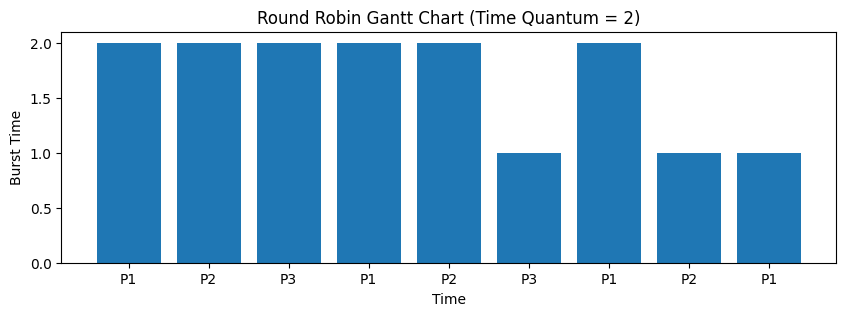

In [ ]:
#from pdf
#
#
import matplotlib.pyplot as plt

def round_robin(processes, burst_time, arrival_time, quantum):
    n = len(processes)
    waiting_time = [0] * n
    turnaround_time = [0] * n
    remaining_time = burst_time.copy()
    completion_time = [0] * n
    time = 0
    timeline = []
    gantt_chart = []

    while any(remaining_time):
        for i in range(n):
            if remaining_time[i] > 0 and arrival_time[i] <= time:
                if remaining_time[i] > quantum:
                    timeline.append(processes[i])
                    gantt_chart.append(quantum)
                    time += quantum
                    remaining_time[i] -= quantum
                else:
                    timeline.append(processes[i])
                    gantt_chart.append(remaining_time[i])
                    time += remaining_time[i]
                    completion_time[i] = time
                    waiting_time[i] = time - burst_time[i] - arrival_time[i]
                    remaining_time[i] = 0
            # Add a small time increment if no process is ready to run
            elif all(r == 0 for r in remaining_time):
                break # All processes completed
            elif all(arrival_time[j] > time for j in range(n) if remaining_time[j] > 0):
                 time += 1


    for i in range(n):
        turnaround_time[i] = completion_time[i] - arrival_time[i]

    avg_waiting_time = sum(waiting_time) / n
    avg_turnaround_time = sum(turnaround_time) / n

    return avg_waiting_time, avg_turnaround_time, timeline, gantt_chart, completion_time, waiting_time, turnaround_time

def main():
    n = int(input("Enter the number of processes: "))
    processes = [f"P{i+1}" for i in range(n)]
    arrival_time = [int(input(f"Enter arrival time for {processes[i]}: ")) for i in range(n)]
    burst_time = [int(input(f"Enter burst time for {processes[i]}: ")) for i in range(n)]
    quantum = int(input("Enter time quantum: "))

    avg_waiting_time, avg_turnaround_time, timeline, gantt_chart, completion_time, waiting_time, turnaround_time = round_robin(processes, burst_time, arrival_time, quantum)

    # Print the table
    print("Process\tArrival Time\tBurst Time\tCompletion Time\tWaiting Time\tTurnaround Time")
    for i in range(n):
        print(f"{processes[i]}\t\t{arrival_time[i]}\t\t{burst_time[i]}\t\t{completion_time[i]}\t\t{waiting_time[i]}\t\t{turnaround_time[i]}")

    print(f"\nAverage Waiting Time: {avg_waiting_time:.2f}")
    print(f"Average Turnaround Time: {avg_turnaround_time:.2f}")

    # Plot the Gantt chart
    plt.figure(figsize=(10, 3))
    plt.bar(range(len(gantt_chart)), gantt_chart, tick_label=timeline)
    plt.xlabel('Time')
    plt.ylabel('Burst Time')
    plt.title(f'Round Robin Gantt Chart (Time Quantum = {quantum})')
    plt.show()

'''
    # Plot the graph for AWT vs. Time Quantum
    quantum_values = list(range(1, 11))
    avg_waiting_times = []
    for quantum_value in quantum_values:
        # Need to create copies of arrival_time and burst_time for each simulation
        avg_waiting_time , _, _, _, _, _, _ = round_robin(processes, burst_time.copy(), arrival_time.copy(), quantum_value)
        avg_waiting_times.append(avg_waiting_time)

    plt.figure(figsize=(8, 4))
    plt.plot(quantum_values, avg_waiting_times, marker='o')
    plt.xlabel('Time Quantum')
    plt.ylabel('Average Waiting Time')
    plt.title('Average Waiting Time (AWT) vs. Time Quantum')
    plt.grid(True)
    plt.show()

    # Plot the graph for ATAT vs. Time Quantum
    avg_turnaround_times = []
    for quantum_value in quantum_values:
        # Need to create copies of arrival_time and burst_time for each simulation
        _, avg_turnaround_time, _, _, _, _, _ = round_robin(processes, burst_time.copy(), arrival_time.copy(), quantum_value)
        avg_turnaround_times.append(avg_turnaround_time)

    plt.figure(figsize=(8, 4))
    plt.plot(quantum_values, avg_turnaround_times, marker='x', color='orange')
    plt.xlabel('Time Quantum')
    plt.ylabel('Average Turnaround Time')
    plt.title('Average Turnaround Time (ATAT) vs. Time Quantum')
    plt.grid(True)
    plt.show()

'''
main()